In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
plt.rcParams["figure.figsize"] = (10, 6)
import seaborn as sns

# Load the data
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [2]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

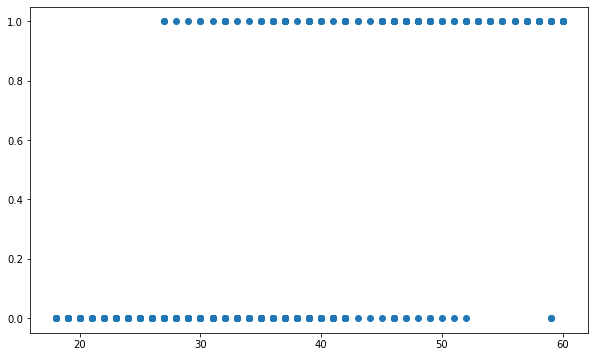

In [3]:
# Visualizing the dataset
plt.scatter(data['Age'], data['Purchased'])
plt.show()

# Divide the data to training set and test set
X_train, X_test, y_train, y_test = train_test_split(data['Age'], data['Purchased'], test_size=0.20)

In [4]:
# Creating the logistic regression model

# Helper function to normalize data
def normalize(X):
    return X - X.mean()

# Method to make predictions
def predict(X, b0, b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])

# Method to train the model
def logistic_regression(X, Y):

    X = normalize(X)

    # Initializing variables
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300

    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b0
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b1
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1
    
    return b0, b1

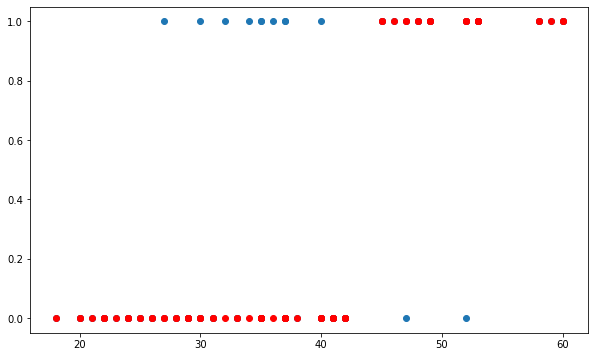

Accuracy = 0.85


In [5]:
# Training the model
b0, b1 = logistic_regression(X_train, y_train)

# Making predictions
#X_test = X_test.sort_values()  # Sorting values is optional only to see the line graph
X_test_norm = normalize(X_test)
y_pred = predict(X_test_norm, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c="red")
# plt.plot(X_test, y_pred, c="red", linestyle='-', marker='o') # Only if values are sorted
plt.show()

# The accuracy
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")

c:\Users\vedan\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


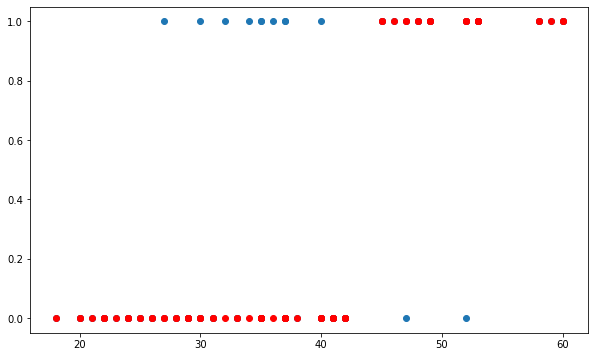

Accuracy = 0.85


In [6]:
# Making predictions using scikit learn
from sklearn.linear_model import LogisticRegression

# Create an instance and fit the model 
lr_model = LogisticRegression()
lr_model.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

# Making predictions
y_pred_sk = lr_model.predict(X_test.values.reshape(-1, 1))
plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_sk, c="red")
plt.show()

# Accuracy
print(f"Accuracy = {lr_model.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1))}")

Show Confusion Matrix, Accuracy and other metrics from above Data?

In [7]:
from sklearn.metrics import confusion_matrix

In [9]:
con=confusion_matrix( y_test.values.reshape(-1, 1),y_pred)

Text(0.5, 1.0, 'Confusion matrix')

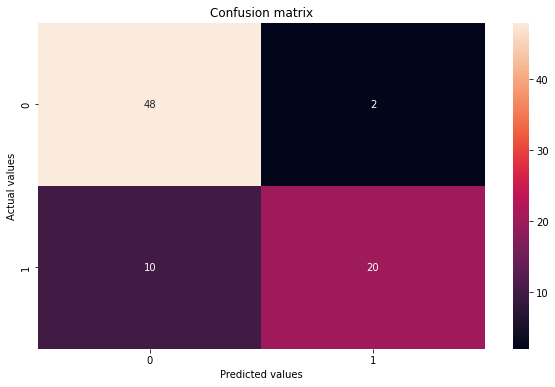

In [10]:
con_p=sns.heatmap(con,annot=True)
con_p.set_xlabel("Predicted values")
con_p.set_ylabel("Actual values")
con_p.set_title("Confusion matrix")

In [11]:
tn, fp, fn, tp=confusion_matrix( y_test.values.reshape(-1, 1),y_pred).ravel()

FPR

In [12]:
fpr=fp/(fp+tn)

In [13]:
fpr

0.04

FNR

In [14]:
fnr=fn/(tp+fn)

In [15]:
fnr

0.3333333333333333

TNR

In [17]:
tnr=tn/(tn+fp)

In [18]:
tnr

0.96

TPR/Recall/Sensitivity

In [19]:
tpr=tp/(tp+fn)
tpr

0.6666666666666666

Precision

In [21]:
pr=tp/(tp+fp)
pr

0.9090909090909091

Accuracy

In [22]:
acc= (tp+tn)/(tp+fp+tn+fn)
acc

0.85

F1-Score

In [23]:
f1=(pr*tpr)/(pr+tpr)
f1

0.3846153846153846

AUC/ROC

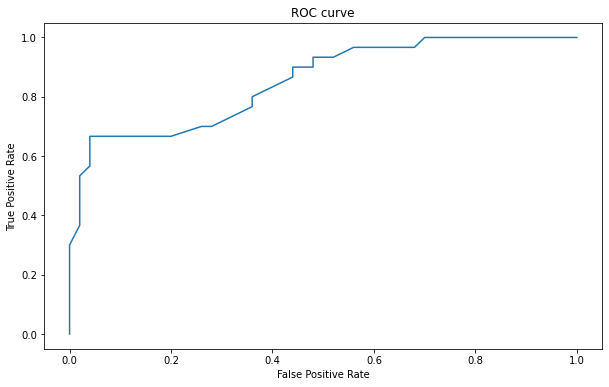

In [24]:
from sklearn import metrics
y_pred_proba = lr_model.predict_proba(X_test.values.reshape(-1, 1))[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.title("ROC curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Precision/Recall curve

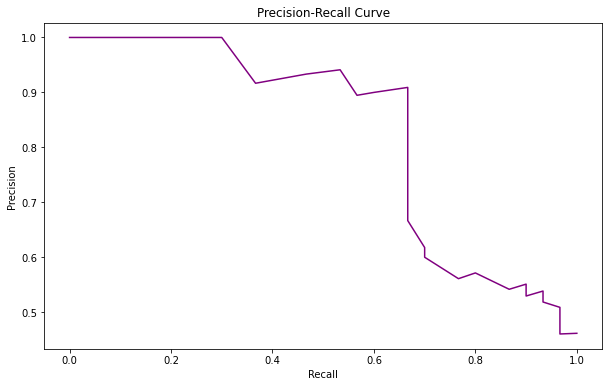

In [25]:
y_score = lr_model.predict_proba(X_test.values.reshape(-1, 1))[::,1]

precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_score)

plt.plot(recall, precision, color='purple')

#add axis labels to plot
plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')

#display plot
plt.show()